# Analyzing Benchmark Results for Validation

In [66]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

import nucml.exfor.data_utilities as exfor_utils
import nucml.evaluation.data_utilities as endf_utils
import nucml.plot.utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.building_utils as model_building
import nucml.model.utilities as model_utils
import nucml.general_utilities as gen_utils
import nucml.ace.plot as ace_plots

In [68]:
import importlib
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
importlib.reload(model_building)
importlib.reload(model_utils)
importlib.reload(ace_plots)
print("Finish re-loading scripts.")

Finish re-loading scripts.


In [69]:
figure_dir = "figures/B0/"

In [70]:
sns.set(font_scale=2.5)
sns.set_style('white')

## Gathering Results from Benchmark Calculations

In [71]:
knn_results = ace_utils.gather_benchmark_results("ml/KNN_B0/")

## Analyzing KNN Results

In [86]:
to_append_knn = pd.read_csv("../ML_EXFOR_neutrons/1_KNN/knn_results_B0.csv")
to_append_knn["scale_energy"] = to_append_knn.run_name.apply(lambda x: True if "v2" in x else False)
to_append_knn["Model"] = to_append_knn.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))

In [87]:
to_append_knn = to_append_knn[["Model", "id", "train_mae", "val_mae", "test_mae", "normalizer", "distance_metric", 'scale_energy', 'model_path']]

In [88]:
knn_final = knn_results.merge(to_append_knn, on="Model")

In [89]:
knn_final["k"] = knn_final.Model.apply(lambda x: x.split("_")[0][1:]).astype(int)

In [90]:
knn_final.sort_values(by="Deviation_Ana").head()

,Model,Benchmark,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,id,train_mae,val_mae,test_mae,normalizer,distance_metric,scale_energy,model_path,k
92,k16_distance_manhattan_minmax_one_hot_B0_v1,U233-MET-FAST-001,0.999901,0.00044,1.000200,0.00028,0.000099,0.000200,16,0.025855,0.121494,0.121403,minmax,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k16_distance_manhatt...,16
78,k15_distance_manhattan_minmax_one_hot_B0_v1,U233-MET-FAST-001,0.999844,0.00044,1.000530,0.00030,0.000156,0.000530,15,0.025860,0.121249,0.121150,minmax,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k15_distance_manhatt...,15
148,k1_distance_manhattan_minmax_one_hot_B0_v1,U233-MET-FAST-001,0.999796,0.00044,0.999632,0.00030,0.000204,0.000368,1,0.029097,0.141874,0.141885,minmax,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k1_distance_manhatta...,1
0,k10_distance_euclidean_maxabs_one_hot_B0_v1,U233-MET-FAST-001,0.999714,0.00043,0.999905,0.00031,0.000286,0.000095,10,0.025883,0.122667,0.121789,maxabs,euclidean,False,E:\ML_Models_EXFOR\KNN_B0\k10_distance_euclide...,10
138,k19_distance_manhattan_robust_one_hot_B0_v1,U233-MET-FAST-001,0.999679,0.00042,1.000480,0.00030,0.000321,0.000480,19,0.025837,0.120461,0.120578,robust,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k19_distance_manhatt...,19


In [91]:
knn_robust_euclidean = knn_final[(knn_final.distance_metric == "manhattan") & (knn_final.normalizer == "minmax") & (knn_final.scale_energy == False)].sort_values(by="k")

In [92]:
model_utils.get_best_models_df(knn_robust_euclidean)

,Model,Benchmark,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,id,train_mae,val_mae,test_mae,normalizer,distance_metric,scale_energy,model_path,k,tag
162,k20_distance_manhattan_minmax_one_hot_B0_v1,U233-MET-FAST-001,0.996677,0.00045,0.996283,0.00030,0.003323,0.003717,20,0.025847,0.122192,0.122125,minmax,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k20_distance_manhatt...,20,Train
274,k9_distance_manhattan_minmax_one_hot_B0_v1,U233-MET-FAST-001,1.004890,0.00041,1.004690,0.00029,0.004890,0.004690,9,0.025922,0.119721,0.119763,minmax,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...,9,Val
260,k8_distance_manhattan_minmax_one_hot_B0_v1,U233-MET-FAST-001,1.005650,0.00043,1.005620,0.00030,0.005650,0.005620,8,0.025938,0.119902,0.119730,minmax,manhattan,False,E:\ML_Models_EXFOR\KNN_B0\k8_distance_manhatta...,8,Test


In [107]:
not_to_delete = knn_final.sort_values(by="Deviation_Ana").head()
not_to_delete = not_to_delete.append(model_utils.get_best_models_df(knn_robust_euclidean))

In [108]:
to_delete = []

In [109]:
for i in knn_final.model_path.values:
    if i not in not_to_delete.model_path.values:
        to_delete.append(os.path.dirname(i))

In [112]:
import shutil

In [113]:
for i in to_delete:
    shutil.rmtree(i) 

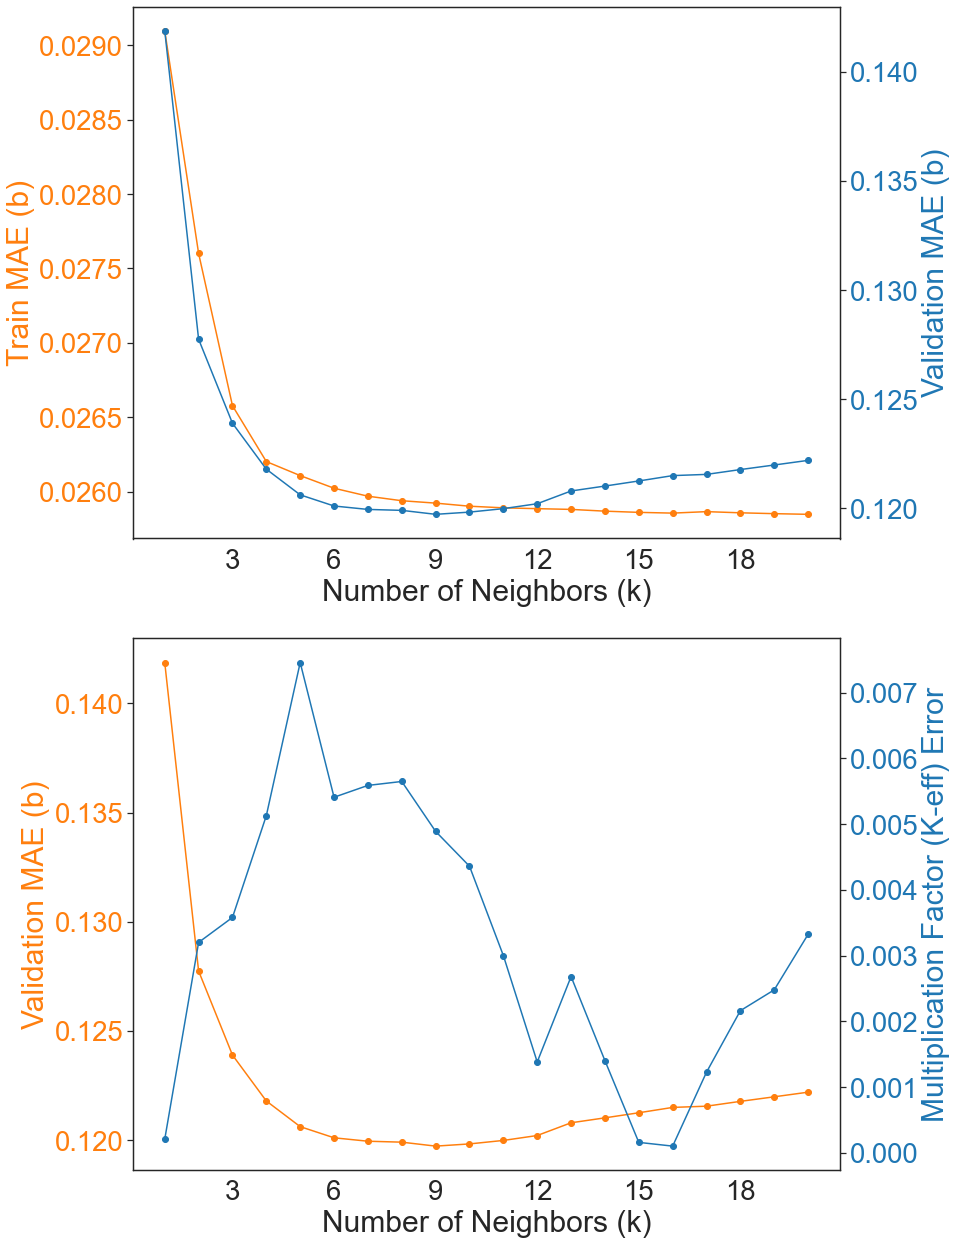

In [15]:
ace_plots.knn_dual_plot(
    knn_robust_euclidean, "k", "train_mae", "val_mae", "Deviation_Ana", save=False, saving_dir=figure_dir)

In [208]:
# ace_plot_utils.knn_dual_plot(
#     knn_robust_euclidean, "k", "train_mae", "val_mae", "K_eff_ana", save=False, saving_dir=figure_dir)

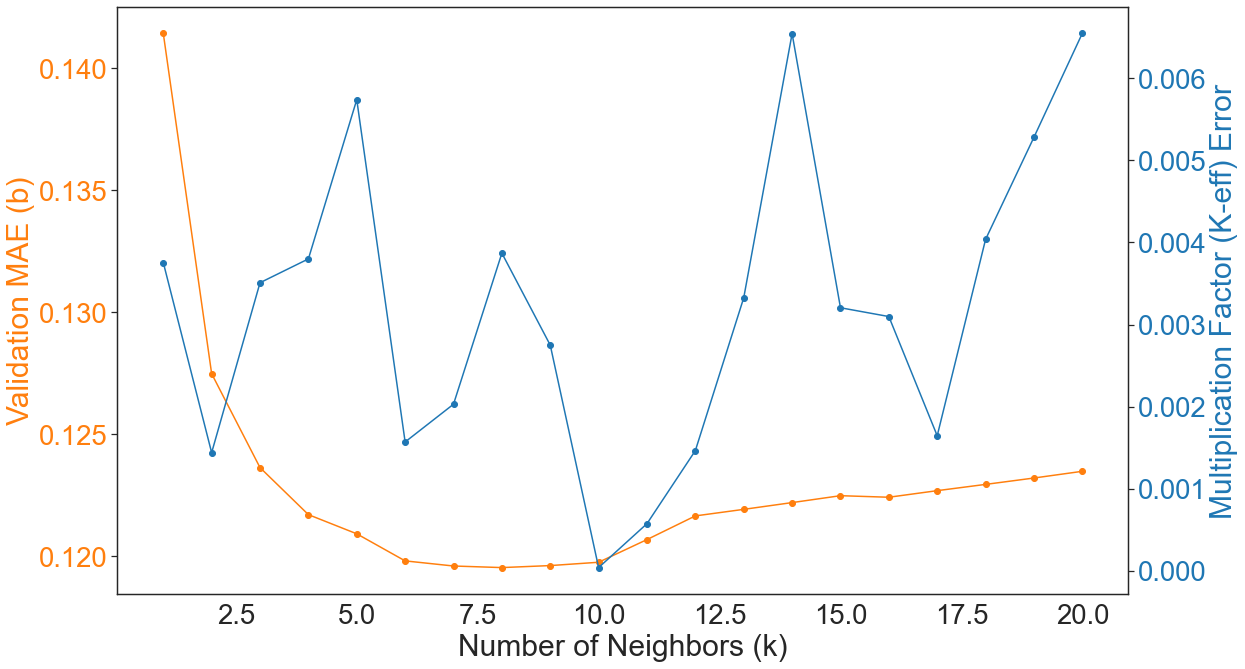

In [210]:
ace_plots.knn_keff_plot(
    knn_robust_euclidean, "k", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)